In [1]:
 # Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("coolwarm")

In [2]:
#Load Crashes and Persons Datasets
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)


1)EDA

In [3]:
# Basic Overview (preview first rows)
print("Crashes dataset preview:")
display(df_crashes.head())

print("Persons dataset preview:")
display(df_persons.head())

Crashes dataset preview:


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


Persons dataset preview:


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [4]:
# Shapes and Columns
print("Crashes shape:", df_crashes.shape)
print("Persons shape:", df_persons.shape)

print("\nCrashes columns:")
print(df_crashes.columns.tolist())

print("\nPersons columns:")
print(df_persons.columns.tolist())

Crashes shape: (2221796, 29)
Persons shape: (5824319, 21)

Crashes columns:
['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

Persons columns:
['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'P

In [5]:
# Data Types and Missing Values
print("Crashes Dataset info:")
df_crashes.info()

print("\nPersons Dataset info:")
df_persons.info()

print("\nMissing Values in Crashes (All Columns, Sorted):")
display(df_crashes.isnull().sum().sort_values(ascending=False).to_frame("Missing Count"))

print("\nMissing Values in Persons (All Columns, Sorted):")
display(df_persons.isnull().sum().sort_values(ascending=False).to_frame("Missing Count"))



Crashes Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221796 entries, 0 to 2221795
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLE

,Missing Count
VEHICLE TYPE CODE 5,2212055
CONTRIBUTING FACTOR VEHICLE 5,2211739
VEHICLE TYPE CODE 4,2186424
CONTRIBUTING FACTOR VEHICLE 4,2185092
VEHICLE TYPE CODE 3,2067263
CONTRIBUTING FACTOR VEHICLE 3,2061016
OFF STREET NAME,1830075
CROSS STREET NAME,849038
ZIP CODE,680813
BOROUGH,680536



Missing Values in Persons (All Columns, Sorted):


,Missing Count
CONTRIBUTING_FACTOR_2,5723320
CONTRIBUTING_FACTOR_1,5723187
PED_ACTION,5721908
PED_LOCATION,5721807
SAFETY_EQUIPMENT,3032827
EJECTION,2829739
POSITION_IN_VEHICLE,2829282
EMOTIONAL_STATUS,2732581
BODILY_INJURY,2732538
COMPLAINT,2732531


In [6]:
# Descriptive Statistics (Transposed for Readability)

# Numerical summary
print("Crashes - Numerical Summary:")
display(df_crashes.describe().T)

print("\nPersons - Numerical Summary:")
display(df_persons.describe().T)

# Categorical summary
print("\nCrashes - Categorical Summary:")
display(df_crashes.describe(include='object').T)

print("\nPersons - Categorical Summary:")
display(df_persons.describe(include='object').T)


Crashes - Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
LATITUDE,1981426.0,4.058932e+01,2.338377e+00,0.00000,4.066733e+01,4.072031e+01,4.076956e+01,4.334444e+01
LONGITUDE,1981426.0,-7.368230e+01,4.345999e+00,-201.35999,-7.397453e+01,-7.392673e+01,-7.386657e+01,0.000000e+00
NUMBER OF PERSONS INJURED,2221778.0,3.283996e-01,7.150102e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF PERSONS KILLED,2221765.0,1.584326e-03,4.204944e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
NUMBER OF PEDESTRIANS INJURED,2221796.0,5.964544e-02,2.501526e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER OF PEDESTRIANS KILLED,2221796.0,7.840504e-04,2.862591e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER OF CYCLIST INJURED,2221796.0,2.920835e-02,1.706601e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER OF CYCLIST KILLED,2221796.0,1.260242e-04,1.126537e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER OF MOTORIST INJURED,2221796.0,2.348951e-01,6.761481e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF MOTORIST KILLED,2221796.0,6.445236e-04,2.776748e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00



Persons - Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
UNIQUE_ID,5824319.0,9.377855e+06,2.763358e+06,10922.0,7099734.5,9575178.0,11887629.5,13538499.0
COLLISION_ID,5824319.0,4.016873e+06,6.650321e+05,37.0,3705655.0,4060966.0,4439928.0,4858610.0
VEHICLE_ID,5582697.0,1.870538e+07,1.621654e+06,123423.0,17600780.0,18807856.0,20019809.0,20972097.0
PERSON_AGE,5173607.0,3.753439e+01,1.117198e+02,-999.0,24.0,36.0,51.0,9999.0



Crashes - Categorical Summary:


,count,unique,top,freq
CRASH DATE,2221796,4888,01/21/2014,1161
CRASH TIME,2221796,1440,16:00,29709
BOROUGH,1541260,5,BROOKLYN,493980
ZIP CODE,1540983,235,11207,30447
LOCATION,1981426,334364,"(0.0, 0.0)",6547
ON STREET NAME,1737701,22731,BROADWAY,17277
CROSS STREET NAME,1372758,24840,3 AVENUE,9843
OFF STREET NAME,391721,259730,772 EDGEWATER ROAD,402
CONTRIBUTING FACTOR VEHICLE 1,2213942,61,Unspecified,743605
CONTRIBUTING FACTOR VEHICLE 2,1864975,61,Unspecified,1569281



Persons - Categorical Summary:


,count,unique,top,freq
CRASH_DATE,5824319,4888,11/15/2018,4220
CRASH_TIME,5824319,1440,0:00,87500
PERSON_ID,5824300,5629496,1,142787
PERSON_TYPE,5824319,4,Occupant,5591468
PERSON_INJURY,5824319,3,Unspecified,5091451
EJECTION,2994580,6,Not Ejected,2933738
EMOTIONAL_STATUS,3091738,8,Does Not Apply,2521488
BODILY_INJURY,3091781,14,Does Not Apply,2552845
POSITION_IN_VEHICLE,2995037,11,Driver,2091691
SAFETY_EQUIPMENT,2791492,17,Lap Belt & Harness,1756607


In [7]:
# Unique Values for Key Columns
for col in ['BOROUGH', 'VEHICLE_TYPE_CODE_1', 'CONTRIBUTING_FACTOR_VEHICLE_1']:
    if col in df_crashes.columns:
        print(f"\nUnique values in {col}:")
        print(df_crashes[col].value_counts().head(10))


Unique values in BOROUGH:
BOROUGH
BROOKLYN         493980
QUEENS           412994
MANHATTAN        341549
BRONX            228206
STATEN ISLAND     64531
Name: count, dtype: int64


/tmp/ipython-input-2024587232.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order, y=counts, palette=colors)
/tmp/ipython-input-2024587232.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=order, y=counts, palette=colors)


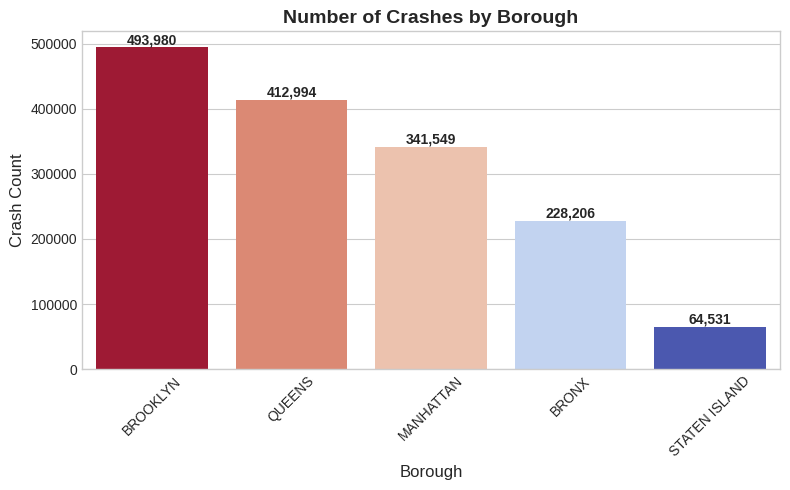

In [8]:
# Crashes per Borough (Vertical Bar Chart, Largest = Red)
if 'BOROUGH' in df_crashes.columns:
    plt.figure(figsize=(8,5))

    # Get boroughs ordered by number of crashes
    order = df_crashes['BOROUGH'].value_counts().index
    counts = df_crashes['BOROUGH'].value_counts().values

    # Normalize counts for color mapping
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))
    colors = plt.cm.coolwarm(norm(counts))  # blue → red gradient

    # Plot
    sns.barplot(x=order, y=counts, palette=colors)

    plt.title("Number of Crashes by Borough", fontsize=14, fontweight='bold')
    plt.xlabel("Borough", fontsize=12)
    plt.ylabel("Crash Count", fontsize=12)
    plt.xticks(rotation=45)

    # Add exact values above bars
    for i, value in enumerate(counts):
        plt.text(i, value + 5000, f'{value:,}', ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


In [9]:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
print(df_crashes['CRASH DATE'].notna().sum())

2221796


In [10]:
# Detect Obvious Data Issues

# Duplicates
print("Duplicate crash IDs:", df_crashes['COLLISION_ID'].duplicated().sum())

# Outlier example: unrealistic latitude/longitude
if 'LATITUDE' in df_crashes.columns:
    out_lat = df_crashes[(df_crashes['LATITUDE'] > 90) | (df_crashes['LATITUDE'] < -90)]
    print("Invalid latitude rows:", len(out_lat))

Duplicate crash IDs: 0
Invalid latitude rows: 0


Using date column: CRASH DATE


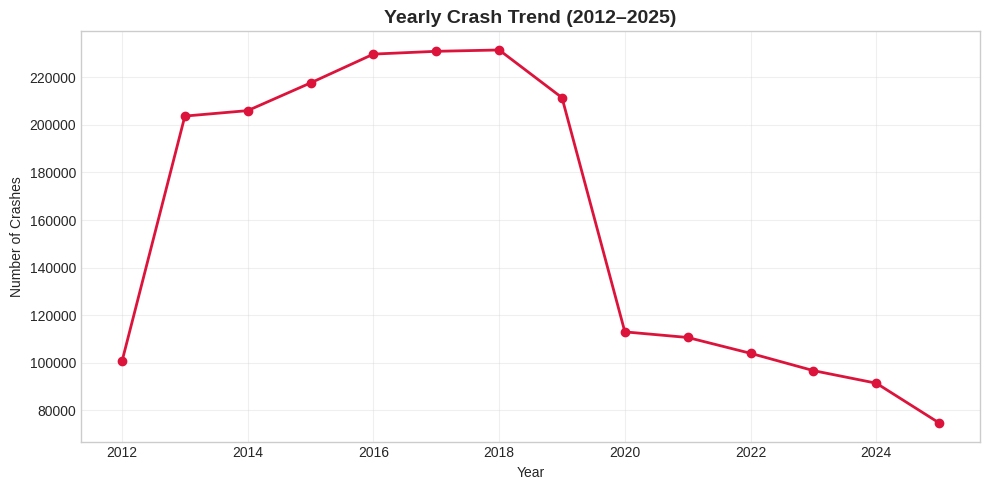

In [11]:
# yearly Crash Trend

# 1️Auto-detect the crash date column
date_col = [c for c in df_crashes.columns if 'date' in c.lower()][0]
print("Using date column:", date_col)

# Convert CRASH DATE to datetime
df_crashes[date_col] = pd.to_datetime(df_crashes[date_col], errors='coerce')

# Extract Year and count crashes
yearly_trend = df_crashes[date_col].dt.year.value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', color='crimson', linewidth=2)
plt.title("Yearly Crash Trend (2012–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.show()




<Figure size 800x500 with 0 Axes>

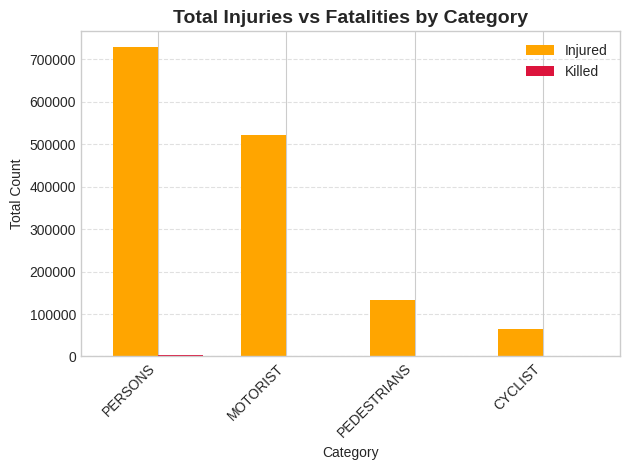

In [12]:
#  Combined Injuries and Fatalities Comparison

import matplotlib.pyplot as plt
import seaborn as sns

# Separate the columns
injury_cols = [col for col in df_crashes.columns if 'INJURED' in col]
fatality_cols = [col for col in df_crashes.columns if 'KILLED' in col]

# Get sums for each
injuries = df_crashes[injury_cols].sum().rename(lambda x: x.replace('NUMBER OF ', '').replace('INJURED', '').strip())
fatalities = df_crashes[fatality_cols].sum().rename(lambda x: x.replace('NUMBER OF ', '').replace('KILLED', '').strip())

# Combine into one DataFrame
combined = pd.DataFrame({
    'Injured': injuries,
    'Killed': fatalities
}).fillna(0)

# Sort by Injured count
combined = combined.sort_values('Injured', ascending=False)

# Plot
plt.figure(figsize=(8,5))
combined.plot(kind='bar', color=['orange', 'crimson'], width=0.7)
plt.title("Total Injuries vs Fatalities by Category", fontsize=14, fontweight='bold')
plt.ylabel("Total Count")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


2) DATA CLEANING AND PRE-INTEGRATION

**Crashes dataset**

In [13]:
missing_count = df_crashes.isnull().sum()
total_rows = df_crashes.shape[0]
print(missing_count/total_rows*100)


CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          30.629995
ZIP CODE                         30.642462
LATITUDE                         10.818725
LONGITUDE                        10.818725
LOCATION                         10.818725
ON STREET NAME                   21.788454
CROSS STREET NAME                38.214039
OFF STREET NAME                  82.369173
NUMBER OF PERSONS INJURED         0.000810
NUMBER OF PERSONS KILLED          0.001395
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.353498
CONTRIBUTING FACTOR VEHICLE 2    16.060025
CONTRIBUTING FACTOR VEHICLE 3    92.763512
CONTRIBUTING FACTOR VEHICLE 4    98.348003
CONTRIBUTING FACTOR VEHICLE 5    99.547348
COLLISION_I

1- Handle missing values

 A) COLUMNS TO DROP

VEHICLE TYPE CODE 3-5 (>90%), CONTRIBUTING FACTOR 3-5 (>90%) ,OFF STREET NAME (82%) :
Reason: Columns with >40% missing data would require excessive imputation that could introduce significant bias.

CROSS STREET NAME (38%):
 Drop - Cannot impute since its probably  MNAR (Missing Not At Random) because most likely the crash didn't happen at an intersection (happened mid-block, on highways, in parking lots, etc.) so it would be redundant /won't be very useful for analysis since we have street name and BOROUGH for location analysis.

B) COLUMNS TO IMPUTE

1 - LAT/LON/LOCATION (~11%) - Multivariate Imputation: Use the attribute mean or median for all samples belonging to the same class:

reason: Geographic data at 11% missing is valuable for spatial analysis. Can impute using borough/street name combinations or use borough centroids as fallback.

2  -impute with mean and mode (<1% missing - minimal impact):

VEHICLE TYPE CODE 1 (0.7%)
CONTRIBUTING FACTOR 1 (0.35%)
Injury/Death counts (<0.01%)

reason: Can leave ut as is , however prefer to fill it with mode for categorical, median for numerical , as small percentages wont cause bias if filled.


In [14]:
df_crashes.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [15]:
df_crashes_copy = df_crashes.copy()


In [16]:
#drop columns
columns_to_drop = [
    'CROSS STREET NAME',            # 38.21% → CANNOT IMPUTE
    'OFF STREET NAME',              # 82.38% → DROP
    'CONTRIBUTING FACTOR VEHICLE 3', # 92.76% → DROP
    'CONTRIBUTING FACTOR VEHICLE 4', # 98.35% → DROP
    'CONTRIBUTING FACTOR VEHICLE 5', # 99.55% → DROP
    'VEHICLE TYPE CODE 3',          # 93.05% → DROP
    'VEHICLE TYPE CODE 4',          # 98.41% → DROP
    'VEHICLE TYPE CODE 5'           # 99.56% → DROP
]

df_crashes_copy.drop(columns=columns_to_drop , inplace=True)

print(df_crashes_copy.shape)


(2221796, 21)


In [17]:
# IMPUTE LATITUDE, LONGITUDE, AND LOCATION

street_col = 'ON STREET NAME'
lat_col = 'LATITUDE'
lon_col = 'LONGITUDE'
location_col = 'LOCATION'

# 1) IMPUTE LAT/LON USING MEDIAN PER STREET
# Only run if the necessary columns exist
if {street_col, lat_col, lon_col}.issubset(df_crashes_copy.columns):

    # Compute the median latitude/longitude for each street
    street_medians = (
        df_crashes_copy
        .groupby(street_col)[[lat_col, lon_col]]
        .median()
        .rename(columns={lat_col: f'{lat_col}_median', lon_col: f'{lon_col}_median'})
        .reset_index()
    )

    # Identify rows with missing LAT/LON but known street name
    to_impute = df_crashes_copy[lat_col].isna() & df_crashes_copy[street_col].notna()

    # If there are missing coordinates to fill
    if to_impute.any():
        # Merge in the street-based median coordinates
        merged = df_crashes_copy[to_impute].merge(street_medians, on=street_col, how='left')

        # Update the missing coordinates
        df_crashes_copy.loc[to_impute, lat_col] = merged[f'{lat_col}_median'].values
        df_crashes_copy.loc[to_impute, lon_col] = merged[f'{lon_col}_median'].values

# 2) IMPUTE ANY REMAINING LAT/LON USING OVERALL MEDIAN
if {lat_col, lon_col}.issubset(df_crashes_copy.columns):
    df_crashes_copy[lat_col].fillna(df_crashes_copy[lat_col].median(), inplace=True)
    df_crashes_copy[lon_col].fillna(df_crashes_copy[lon_col].median(), inplace=True)

# 3) REBUILD THE LOCATION COLUMN FROM LAT/LON
if location_col in df_crashes_copy.columns:
    df_crashes_copy[location_col] = df_crashes_copy.apply(
        lambda row: f"({row[lat_col]}, {row[lon_col]})"
        if pd.notna(row[lat_col]) and pd.notna(row[lon_col])
        else None,
        axis=1
    )

/tmp/ipython-input-3277897903.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes_copy[lat_col].fillna(df_crashes_copy[lat_col].median(), inplace=True)
/tmp/ipython-input-3277897903.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [18]:
# Impute with mode/median for small missing percentages and categorical values

df_crashes_copy["ON STREET NAME"] = df_crashes_copy["ON STREET NAME"].fillna(df_crashes_copy["ON STREET NAME"].mode()[0])

df_crashes_copy["BOROUGH"] = df_crashes_copy["BOROUGH"].fillna(df_crashes_copy["BOROUGH"].mode()[0])

df_crashes_copy["ZIP CODE"] = df_crashes_copy["ZIP CODE"].fillna(df_crashes_copy["ZIP CODE"].mode()[0])

df_crashes_copy["VEHICLE TYPE CODE 1"] = df_crashes_copy["VEHICLE TYPE CODE 1"].fillna(df_crashes_copy["VEHICLE TYPE CODE 1"].mode()[0])

df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 1"] = df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 1"].fillna(df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 1"].mode()[0])

df_crashes_copy["VEHICLE TYPE CODE 2"] = df_crashes_copy["VEHICLE TYPE CODE 2"].fillna(df_crashes_copy["VEHICLE TYPE CODE 2"].mode()[0])

df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 2"] = df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 2"].fillna(df_crashes_copy["CONTRIBUTING FACTOR VEHICLE 2"].mode()[0])

# For injury and death columns, since they are continuous values, we'll either fill with mean or median, depending on distribution
injury_death_cols = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

for col in injury_death_cols:
    skewness = df_crashes_copy[col].skew()

    if abs(skewness) > 1:
        df_crashes_copy[col].fillna(df_crashes_copy[col].median(), inplace=True)
    else:
        df_crashes_copy[col].fillna(df_crashes_copy[col].mean(), inplace=True)

    df_crashes_copy[col] = df_crashes_copy[col].round().astype(int)

/tmp/ipython-input-1782700016.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes_copy[col].fillna(df_crashes_copy[col].median(), inplace=True)
/tmp/ipython-input-1782700016.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

2- detecting outliers

**Numerical Columns to Check:**
- LATITUDE / LONGITUDE (geographic bounds)
- Injury/Death counts (physiological limits)


**Outlier Detection Strategy:**
1. Domain Rules for latitude/longitude : NYC is within 40.5-40.9°N, 73.7-74.1°W
  Reason: we have knowledge of domain rules/constraints , being NYC Latitude & Longitude Bounds.
2. IQR Method for injury/death counts
Reason: lack domain knowledge and we only want to catch statistical anomalies.


In [19]:
#use of domain rules to filter out records with invalid coordinates

# NYC bounding box (with small buffer for bridges/tunnels)
LAT_MIN, LAT_MAX = 40.4, 41.0
LON_MIN, LON_MAX = -74.3, -73.6

df_crashes_copy = df_crashes_copy[(df_crashes_copy['LATITUDE']>=LAT_MIN)&
                                  (df_crashes_copy['LATITUDE']<=LAT_MAX)&
                                  (df_crashes_copy['LONGITUDE']>=LON_MIN)&
                                  (df_crashes_copy['LONGITUDE']<=LON_MAX)]
print(df_crashes_copy.shape)

(2214857, 21)


We wont remove outliers in crashes number of people injured ,because they are real events, not errors, which includes rare multi-person events.

In [20]:
def detect_outliers_iqr(df, column):

    #find q1 and q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #determine upper and lower limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    #compute outlier
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit


def plot_box_with_limits(df, column):
    # Detect outliers + limits
    outliers, lower_limit, upper_limit = detect_outliers_iqr(df, column)

    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column].dropna(), vert=True)

    # Add IQR fences (lower & upper limit)
    plt.axhline(lower_limit, linestyle='--')
    plt.axhline(upper_limit, linestyle='--')

    plt.title(f"Box Plot for {column} with IQR Limits")
    plt.ylabel(column)
    plt.show()


NUMBER OF PERSONS INJURED outliers:
  IQR limits: [0.0, 0.0]
  Outliers detected: 536474 (24.22%)
  Max value: 43


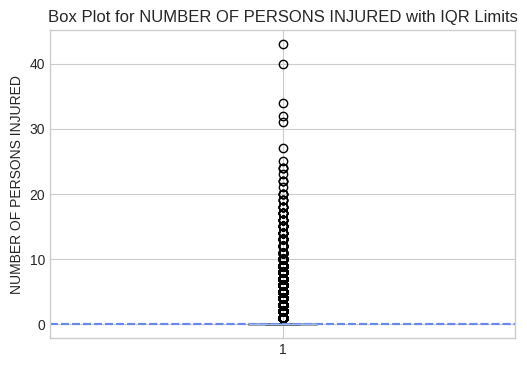

In [21]:
outliers, lower, upper = detect_outliers_iqr(df_crashes_copy, 'NUMBER OF PERSONS INJURED')

print(f"NUMBER OF PERSONS INJURED outliers:")

print(f"  IQR limits: [{lower:.1f}, {upper:.1f}]")

print(f"  Outliers detected: {len(outliers)} ({(len(outliers)/len(df_crashes_copy))*100:.2f}%)")

print(f"  Max value: {df_crashes_copy['NUMBER OF PERSONS INJURED'].max()}")

plot_box_with_limits(df_crashes_copy, 'NUMBER OF PERSONS INJURED')

3- Standardize Formats

**Format Issues Identified:**
1. CRASH DATE: Currently object type, needs datetime
2. CRASH TIME: Currently object, should be time/datetime
3. ZIP CODE: Stored as object, should be string (has leading zeros)
4. BOROUGH: Inconsistent capitalization (if any)
5. Categorical columns: Trim whitespace, standardize 'Unspecified' variants

In [22]:
# Convert date column to datetime format and handle invalid dates
df_crashes_copy['CRASH DATE'] = pd.to_datetime(df_crashes_copy['CRASH DATE'], errors='coerce')
invalid_dates = df_crashes_copy['CRASH DATE'].isna().sum()

if invalid_dates > 0:
    df_crashes_copy = df_crashes_copy.dropna(subset=['CRASH DATE'])

# Extract date features for analysis
df_crashes_copy['CRASH_YEAR'] = df_crashes_copy['CRASH DATE'].dt.year
df_crashes_copy['CRASH_MONTH'] = df_crashes_copy['CRASH DATE'].dt.month
df_crashes_copy['CRASH_DAY_OF_WEEK'] = df_crashes_copy['CRASH DATE'].dt.dayofweek

#time to string and remove whitespace
df_crashes_copy['CRASH TIME'] = df_crashes_copy['CRASH TIME'].astype(str).str.strip()

# Standardize zip code as string and remove whitespace
df_crashes_copy['ZIP CODE'] = df_crashes_copy['ZIP CODE'].astype(str).str.strip()

# Standardize borough to uppercase and remove whitespace
df_crashes_copy['BOROUGH'] = df_crashes_copy['BOROUGH'].str.upper().str.strip()

# Clean street name columns by removing whitespace
street_cols = ['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']
for col in street_cols:
    if col in df_crashes_copy.columns:
        df_crashes_copy[col] = df_crashes_copy[col].str.strip()

# Standardize contributing factors and vehicle type codes
factor_cols = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']
vehicle_cols = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']

for col in factor_cols + vehicle_cols:
    if col in df_crashes_copy.columns:
        df_crashes_copy[col] = df_crashes_copy[col].str.strip()
        df_crashes_copy[col] = df_crashes_copy[col].replace('', 'Unspecified')
        df_crashes_copy[col] = df_crashes_copy[col].replace({
            'Unspecifed': 'Unspecified',
            'Unknown': 'Unspecified',
            'Other': 'Other/Unknown'
        })

4- Handle duplicates

In [23]:
duplicates = df_crashes_copy.duplicated().sum()
print(duplicates)

0


In [24]:
missing_count = df_crashes_copy.isnull().sum()
total_rows = df_crashes_copy.shape[0]
print(missing_count/total_rows*100)

CRASH DATE                       0.0
CRASH TIME                       0.0
BOROUGH                          0.0
ZIP CODE                         0.0
LATITUDE                         0.0
LONGITUDE                        0.0
LOCATION                         0.0
ON STREET NAME                   0.0
NUMBER OF PERSONS INJURED        0.0
NUMBER OF PERSONS KILLED         0.0
NUMBER OF PEDESTRIANS INJURED    0.0
NUMBER OF PEDESTRIANS KILLED     0.0
NUMBER OF CYCLIST INJURED        0.0
NUMBER OF CYCLIST KILLED         0.0
NUMBER OF MOTORIST INJURED       0.0
NUMBER OF MOTORIST KILLED        0.0
CONTRIBUTING FACTOR VEHICLE 1    0.0
CONTRIBUTING FACTOR VEHICLE 2    0.0
COLLISION_ID                     0.0
VEHICLE TYPE CODE 1              0.0
VEHICLE TYPE CODE 2              0.0
CRASH_YEAR                       0.0
CRASH_MONTH                      0.0
CRASH_DAY_OF_WEEK                0.0
dtype: float64


Persons dataset precleaning

A) Dropped Columns:

drop CONTRIBUTING_FACTOR_1/2 (98%),PED_ACTION/PED_LOCATION (98%),SAFETY_EQUIPMENT (52%),POSITION_IN_VEHICLE/EJECTION (48%),EMOTIONAL_STATUS/BODILY_INJURY (47%).

Reason: Columns with >40% missing data would require excessive imputation that could introduce significant bias.

drop PERSON_ID ,VEHICLE_ID .
Reason:dropped it since we cannot fill an id with mode or median and we dont need it in the joining process

B) Imputed Columns (less than 40% missing):

PERSON_AGE (11%): Valuable demographic variable for injury analysis; imputed using median (if skewed) or mean (if normal distribution)
PERSON_SEX (11%): Important for demographic patterns; imputed using mode to preserve most common category

In [25]:
df_persons_copy = df_persons.copy()

In [26]:
df_persons_copy.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [27]:
cols_to_drop = [
    'CONTRIBUTING_FACTOR_1',      # 98%
    'CONTRIBUTING_FACTOR_2',      # 98%
    'PED_ACTION',                 # 98%
    'PED_LOCATION',               # 98%
    'SAFETY_EQUIPMENT',           # 52%
    'POSITION_IN_VEHICLE',        # 48%
    'EMOTIONAL_STATUS',           # 47%
    'BODILY_INJURY',              # 47%
    'EJECTION',                   # 48%
    'COMPLAINT',
    'PERSON_ID', #dropped it since we cannot fill an id with mode or median and we dont need it in the joining process
    'VEHICLE_ID' #dropped it since we cannot fill an id with mode or median and we dont need it in the joining process
]

df_persons_copy.drop(columns=cols_to_drop, inplace=True)

In [28]:
df_persons_copy.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_TYPE',
       'PERSON_INJURY', 'PERSON_AGE', 'PED_ROLE', 'PERSON_SEX'],
      dtype='object')

In [29]:
df_persons_copy['PED_ROLE']= df_persons_copy['PED_ROLE'].fillna(df_persons_copy['PED_ROLE'].mode()[0])


In [30]:
df_persons_copy['PERSON_SEX']=df_persons_copy['PERSON_SEX'].fillna(df_persons_copy["PERSON_SEX"].mode()[0])

2-Handle outliers
Domain rules for PERSON_AGE : we know an average human lives between 0-120 years, we have domain specific knowledge

In [31]:
df_persons_copy = df_persons_copy[(df_persons_copy['PERSON_AGE'] >= 0) & (df_persons_copy['PERSON_AGE'] <= 120)]

3-standardize format

In [32]:
# Standardize date/time and categorical columns
df_persons['CRASH_DATE'] = pd.to_datetime(df_persons['CRASH_DATE'], errors='coerce')
df_persons = df_persons.dropna(subset=['CRASH_DATE'])
df_persons['CRASH_TIME'] = df_persons['CRASH_TIME'].astype(str).str.strip()

# Standardize categorical columns
categorical_cols = ['PERSON_TYPE', 'PERSON_INJURY', 'PERSON_SEX']
for col in categorical_cols:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype(str).str.strip()
        df_persons[col] = df_persons[col].replace({'nan': 'Unknown', 'NaN': 'Unknown', '': 'Unknown'})

Handle duplicates

In [33]:
print(df_persons_copy.duplicated().sum())

0


In [34]:
missing_count = df_persons_copy.isnull().sum()
total_rows = df_persons_copy.shape[0]
print(missing_count/total_rows*100)

UNIQUE_ID        0.0
COLLISION_ID     0.0
CRASH_DATE       0.0
CRASH_TIME       0.0
PERSON_TYPE      0.0
PERSON_INJURY    0.0
PERSON_AGE       0.0
PED_ROLE         0.0
PERSON_SEX       0.0
dtype: float64


In [35]:
# export cleaned datasets to csv
crashes_output = 'crashes_cleaned.csv'
persons_output = 'persons_cleaned.csv'

df_crashes_copy.to_csv(crashes_output, index=False)
df_persons_copy.to_csv(persons_output, index=False)

import os
crashes_size = os.path.getsize(crashes_output) / (1024**2)
persons_size = os.path.getsize(persons_output) / (1024**2)

print(f"\nExported:")
print(f"  {crashes_output}: {crashes_size:.1f} MB ({len(df_crashes):,} records)")
print(f"  {persons_output}: {persons_size:.1f} MB ({len(df_persons):,} records)")


Exported:
  crashes_cleaned.csv: 404.1 MB (2,221,796 records)
  persons_cleaned.csv: 343.6 MB (5,824,319 records)


Joining section

In [36]:
# Load cleaned datasets
df_crashes = pd.read_csv("crashes_cleaned.csv")
df_persons = pd.read_csv("persons_cleaned.csv")

In [37]:
# Inspect key column presence
print(df_crashes.columns)
print(df_persons.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'CRASH_YEAR', 'CRASH_MONTH',
       'CRASH_DAY_OF_WEEK'],
      dtype='object')
Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_TYPE',
       'PERSON_INJURY', 'PERSON_AGE', 'PED_ROLE', 'PERSON_SEX'],
      dtype='object')


In [38]:
# Ensure COLLISION_ID exists in both
assert "COLLISION_ID" in df_crashes.columns
assert "COLLISION_ID" in df_persons.columns

In [39]:
# Perform the join
df_merged = pd.merge(
    df_crashes,
    df_persons,
    on="COLLISION_ID",
    how="inner"   # best join for this project
)

In [40]:
# Preview
print(df_merged.head())
print(df_merged.info())

   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  2021-09-11       2:39  BROOKLYN   11207.0  40.780760 -73.825424   
1  2021-09-11       2:39  BROOKLYN   11207.0  40.780760 -73.825424   
2  2021-09-11       2:39  BROOKLYN   11207.0  40.780760 -73.825424   
3  2022-03-26      11:45  BROOKLYN   11207.0  40.750223 -73.955238   
4  2022-03-26      11:45  BROOKLYN   11207.0  40.750223 -73.955238   

                    LOCATION           ON STREET NAME  \
0     (40.78076, -73.825424)    WHITESTONE EXPRESSWAY   
1     (40.78076, -73.825424)    WHITESTONE EXPRESSWAY   
2     (40.78076, -73.825424)    WHITESTONE EXPRESSWAY   
3  (40.7502231, -73.9552383)  QUEENSBORO BRIDGE UPPER   
4  (40.7502231, -73.9552383)  QUEENSBORO BRIDGE UPPER   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  ...  CRASH_MONTH  \
0                          2                         0  ...            9   
1                          2                         0  ...            9   
2       

In [ ]:
# Save merged dataset for post-cleaning
df_merged.to_csv("merged_crashes_persons.csv", index=False)

Reasons for choosing inner join:

_The Crashes dataset has 1 row per crash.

_The Persons dataset has multiple rows per crash (one per person involved).

_Using INNER join keeps only entries where both datasets share the same COLLISION_ID.

Added value after using inner join:

1)Ensures all final records are meaningful where only crashes that have associated person-level details remain.

2)Avoids noise or irrelevant data where inner join drops crash events with no people recorded.

3)Prevents huge spike in nulls where the LEFT join would keep crashes with missing person data → many NaNs.

4)Provides richer insights where we get combined crash-level + person-level features for deeper analysis.

Post-cleaning of merged datasets

In [ ]:
df_merged.columns.tolist()

In [ ]:
#Fill missing values in key columns
df_merged["BOROUGH"] = df_merged["BOROUGH"].fillna("Unknown").astype(str)
df_merged["ON STREET NAME"] = df_merged["ON STREET NAME"].fillna("Unknown").astype(str)
df_merged["ZIP CODE"] = pd.to_numeric(df_merged["ZIP CODE"], errors="coerce").fillna(0)
df_merged["NUMBER OF PERSONS INJURED"] = df_merged["NUMBER OF PERSONS INJURED"].fillna(0)
df_merged["NUMBER OF PERSONS KILLED"] = df_merged["NUMBER OF PERSONS KILLED"].fillna(0)
df_merged["CONTRIBUTING FACTOR VEHICLE 1"] = df_merged["CONTRIBUTING FACTOR VEHICLE 1"].fillna("Unspecified").astype(str)

In [ ]:
#Fixing Data Types
df_merged["CRASH DATE"] = pd.to_datetime(df_merged["CRASH DATE"], errors="coerce")
df_merged["CRASH TIME"] = pd.to_datetime(df_merged["CRASH TIME"], errors="coerce").dt.time
df_merged["LATITUDE"] = pd.to_numeric(df_merged["LATITUDE"], errors="coerce")
df_merged["LONGITUDE"] = pd.to_numeric(df_merged["LONGITUDE"], errors="coerce")

In [ ]:
 #final verification
key_cols = ['BOROUGH', 'ZIP CODE', 'NUMBER OF PERSONS INJURED',
            'NUMBER OF PERSONS KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'ON STREET NAME']

print("\nMissing values after cleaning:")
print(df_merged[key_cols].isna().sum())

print("\nData types after cleaning:")
print(df_merged[key_cols].dtypes)

print("\nSample BOROUGH values:", df_merged['BOROUGH'].unique()[:10])
print("\nSample ON STREET NAME values:", df_merged['ON STREET NAME'].unique()[:10])
print("Sample CONTRIBUTING_FACTOR_VEHICLE_1 values:", df_merged['CONTRIBUTING FACTOR VEHICLE 1'].unique()[:10])

print("\nMin/Max ZIP CODE:", df_merged['ZIP CODE'].min(), "/", df_merged['ZIP CODE'].max())
print("Min/Max NUMBER_OF_PERSONS_INJURED:", df_merged['NUMBER OF PERSONS INJURED'].min(),
      "/", df_merged['NUMBER OF PERSONS INJURED'].max())
print("Min/Max NUMBER_OF_PERSONS_KILLED:", df_merged['NUMBER OF PERSONS KILLED'].min(),
      "/", df_merged['NUMBER OF PERSONS KILLED'].max())


In [ ]:
# REMOVE DUPLICATED / REDUNDANT COLUMNS

# 1) Remove fully duplicated columns (same values across all rows)
def find_duplicate_columns(df):
    duplicates = {}
    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                duplicates[columns[j]] = columns[i]
    return duplicates

duplicate_cols = find_duplicate_columns(df_merged)

print("Duplicate columns found:")
print(duplicate_cols)

# Drop the duplicated ones
df_merged = df_merged.drop(columns=list(duplicate_cols.keys()), errors='ignore')


# 2) Remove redundant columns manually if needed (example list)
redundant_cols = [
    'LOCATION', 'CROSS STREET NAME', 'OFF STREET NAME',
    'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
]

df_merged = df_merged.drop(columns=[c for c in redundant_cols if c in df_merged.columns], errors='ignore')


# STANDARDIZE COLUMN NAMES

df_merged.columns = (
    df_merged.columns
    .str.strip()               # remove extra spaces
    .str.lower()               # make lowercase
    .str.replace(' ', '_')     # replace spaces with _
    .str.replace('/', '_')     # replace /
    .str.replace('-', '_')     # replace -
)

print("\nCleaned + standardized column names:")
print(df_merged.columns.tolist())


In [ ]:
total_rows = df_merged.shape[0]
print(df_merged.isnull().sum()/total_rows*100)


In [ ]:
duplicates = df_merged.duplicated().sum()
print(duplicates)

In [ ]:
# CLEAN + GROUP VEHICLE TYPES

import numpy as np
import re

if "vehicle_type_code_1" in df_merged.columns:

    # ---------- 1. Normalize ----------
    df_merged["vehicle_type_code_1"] = (
        df_merged["vehicle_type_code_1"]
        .astype(str)
        .str.upper()
        .str.strip()
    )

    # ---------- 2. Remove corrupted characters ----------
    df_merged["vehicle_type_code_1"] = df_merged["vehicle_type_code_1"].str.replace(
        r"[^A-Z0-9 /-]", "", regex=True
    )

    # ---------- 3. Convert pure numbers → NaN (garbage values) ----------
    df_merged.loc[
        df_merged["vehicle_type_code_1"].str.fullmatch(r"\d+"),
        "vehicle_type_code_1"
    ] = np.nan

    # ---------- 4. Convert empty strings → NaN ----------
    df_merged.loc[
        df_merged["vehicle_type_code_1"].str.strip() == "",
        "vehicle_type_code_1"
    ] = np.nan

    # ---------- 5. Replace NaN with UNSPECIFIED ----------
    df_merged["vehicle_type_code_1"] = df_merged["vehicle_type_code_1"].fillna("UNSPECIFIED")

    # 6. Categorize Vehicle Types

    def categorize_vehicle(v: str) -> str:
        # Passenger cars
        if any(x in v for x in ["SEDAN", "PASSENGER", "COUPE", "HATCHBACK"]):
            return "PASSENGER CAR"
        if "SPORT UTILITY" in v or "STATION WAGON" in v or v == "SUV":
            return "SUV / VAN"
        if "MINI VAN" in v or "MINIVAN" in v or v == "VAN" or "VAN " in v:
            return "SUV / VAN"

        # Bicycles / scooters
        if any(x in v for x in ["BIKE", "BICYCLE", "PEDAL BIKE"]):
            return "BICYCLE / SCOOTER"
        if any(x in v for x in ["SCOOT", "SCOOTER", "E-SCOOTER", "E SCOOTER", "E-SKATE"]):
            return "BICYCLE / SCOOTER"
        if any(x in v for x in ["E-BIKE", "EBIKE"]):
            return "BICYCLE / SCOOTER"

        # Motorcycles / mopeds
        if any(x in v for x in ["MOTORCYCLE", "MOTORBIKE", "MINIBIKE", "MOTORBIK"]):
            return "MOTORCYCLE / MOPED"
        if any(x in v for x in ["MOPED", "MO-PED"]):
            return "MOTORCYCLE / MOPED"

        # Buses
        if "BUS" in v or "OMNIBUS" in v or "SCHOOL BUS" in v:
            return "BUS"

        # Trucks / commercial
        if any(x in v for x in [
            "PICKUP", "PICK-UP", "BOX TRUCK", "FLATBED", "DUMP",
            "TRACTOR TRUCK", "SEMI", "TANKER", "DELIVERY"
        ]):
            return "TRUCK / COMMERCIAL"
        if "LARGE COM VEH" in v or "SMALL COM VEH" in v:
            return "TRUCK / COMMERCIAL"
        if any(x in v for x in ["PENSKE", "FEDEX", "UPS"]):
            return "TRUCK / COMMERCIAL"

        # Emergency
        if any(x in v for x in ["AMBUL", "EMS", "FDNY", "FIRE", "EMERGENCY"]):
            return "EMERGENCY VEHICLE"

        # Government / service
        if any(x in v for x in ["GOV", "USPS", "POSTAL", "NYC ", "NYPD", "NYFD", "SANITATION"]):
            return "GOV / SERVICE / UTILITY"
        if any(x in v for x in ["UTILITY", "TOW TRUCK", "TOW-TRUCK", "TOW TRUCK / WRECKER"]):
            return "GOV / SERVICE / UTILITY"

        # Fallback
        return "OTHER / UNKNOWN"

    df_merged["vehicle_category"] = df_merged["vehicle_type_code_1"].apply(categorize_vehicle)

    print("\nVehicle categories (value_counts):")
    print(df_merged["vehicle_category"].value_counts())

else:
    print("WARNING: 'vehicle_type_code_1' not found in df_merged.columns")

In [ ]:
# Wrong values you want to remove
invalid_vals = ["1", 1, "80", 80, "", None, float("nan")]

# Step 1 — normalize both columns (uppercase, no spaces)
df_merged["contributing_factor_vehicle_1"] = (
    df_merged["contributing_factor_vehicle_1"]
    .astype(str).str.upper().str.strip()
)

df_merged["contributing_factor_vehicle_2"] = (
    df_merged["contributing_factor_vehicle_2"]
    .astype(str).str.upper().str.strip()
)

# Step 2 — replace invalid values with NaN
df_merged["contributing_factor_vehicle_1"] = df_merged["contributing_factor_vehicle_1"].replace(invalid_vals, pd.NA)
df_merged["contributing_factor_vehicle_2"] = df_merged["contributing_factor_vehicle_2"].replace(invalid_vals, pd.NA)

# Step 3 — combine both: take first non-null value
df_merged["contributing_factor_combined"] = df_merged["contributing_factor_vehicle_1"].fillna(
    df_merged["contributing_factor_vehicle_2"]
)

# Step 4 — if still empty, mark as "OTHER / UNKNOWN"
df_merged["contributing_factor_combined"] = df_merged["contributing_factor_combined"].fillna("OTHER / UNKNOWN")

print("Unique combined values:")
print(df_merged["contributing_factor_combined"].unique())

#drop those two columns as we combined them into one
df_merged = df_merged.drop(columns=["contributing_factor_vehicle_1",
                                   "contributing_factor_vehicle_2"])


In [ ]:
# Only convert object columns (non-numeric columns) to clean strings
obj_cols = df_merged.select_dtypes(include=["object"]).columns

# Convert these columns to strings safely
for col in obj_cols:
    df_merged[col] = df_merged[col].astype(str).replace("nan", "")

In [ ]:
# save the cleaned version
df_merged.to_csv("final_cleaned2.csv", index=False)

In [ ]:
import pandas as pd
# Load the saved cleaned dataset
df_cleaned = pd.read_csv("final_cleaned2.csv")

# Check for null values per column
print("Null values per column:")
print(df_cleaned.isnull().sum())

# Check total null values
print("Total null values:", df_cleaned.isnull().sum().sum())

# Check number of duplicated rows
print("Duplicated rows:", df_cleaned.duplicated().sum())